# Interpreting Data Using Statistical Models 1)

In [833]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import researchpy as rp
from sklearn.preprocessing import scale
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")

In [834]:
sns.set_theme(color_codes=True)

In [835]:
df = pd.read_csv("C:/Users/Imy Hull/datasets/day.csv")

In [836]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [837]:
df.shape

(731, 16)

In [838]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [839]:
bike = df[['season','mnth','holiday','workingday','weathersit','temp','cnt']]
bike.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


#### Question: Does working day or temperature affect the number of bikes that are hired?

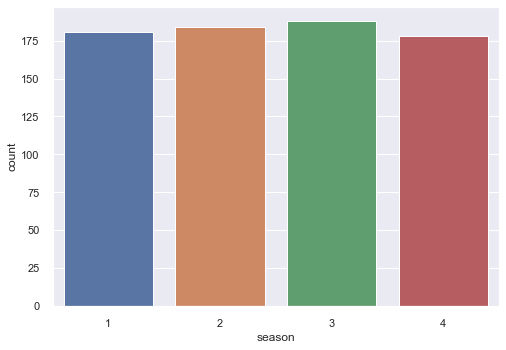

In [840]:
sns.countplot(data = bike, x = "season");

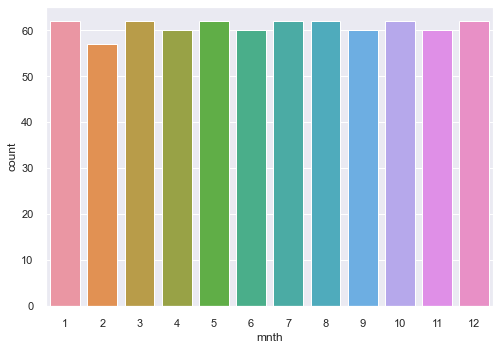

In [841]:
sns.countplot(data = bike, x = "mnth");

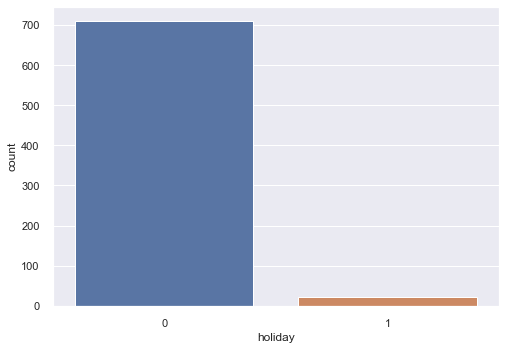

In [842]:
sns.countplot(data = bike, x = "holiday");

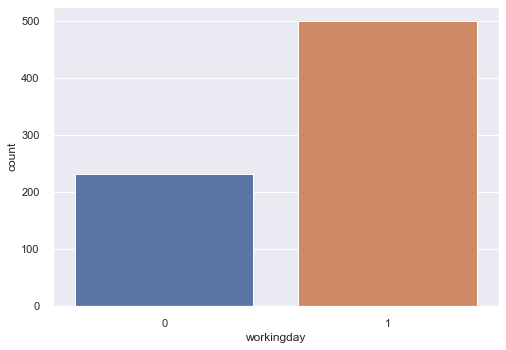

In [843]:
sns.countplot(data = bike, x = "workingday");

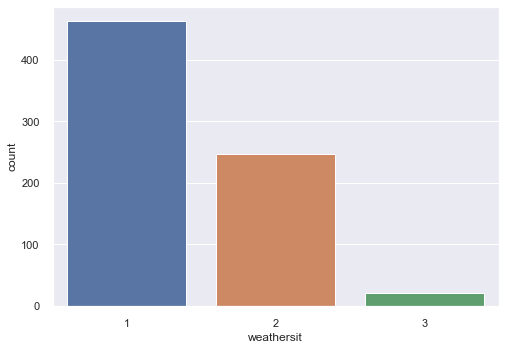

In [844]:
sns.countplot(data = bike, x = "weathersit");

Weather codes:

* 1 is clear
* 2 cloudy or misty
* 3 snow, rain, storms

In [845]:
# Scaled data for temperature
bike.temp.describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

## Does whether it is a working day or not affect the number of bikes hired?

In [846]:
# Compare the average number of bikes hired on a working day is different from a non-working day
bike.groupby("workingday")["cnt"].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


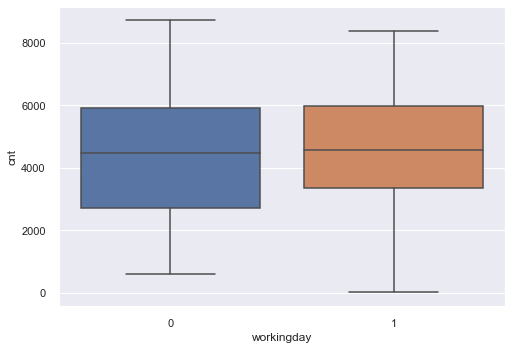

In [847]:
# Is the difference significant?
sns.boxplot(data = bike, x = "workingday", y = "cnt");

The medians are similar for working and non-working days

In [848]:
# Split data into two datasets
working_days = bike[bike["workingday"] == 1]
non_working_days = bike[bike["workingday"] == 0]

#### Are sample sizes the same?

In [849]:
working_days.shape

(500, 7)

In [850]:
non_working_days.shape

(231, 7)

In [851]:
# Take a sample of the larger dataset to match
working = working_days.sample(231)

In [852]:
working.shape

(231, 7)

In [853]:
working.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
506,2,5,0,1,2,0.598333,4359
517,2,6,0,1,2,0.654167,4127
255,3,9,0,1,1,0.650833,4763
489,2,5,0,1,1,0.627500,6296
438,1,3,0,1,1,0.572500,6312


#### Are the variances the same?

In [854]:
# Null hypothesis - the two variances are the same
stats.levene(working.cnt, non_working_days.cnt)

LeveneResult(statistic=3.204208931955052, pvalue=0.07410660690521816)

The p-value is above 0.05, so we cannot reject the Null Hypothesis. The variances are the same

#### Distribution of residuals between the two samples should follow normal distribution

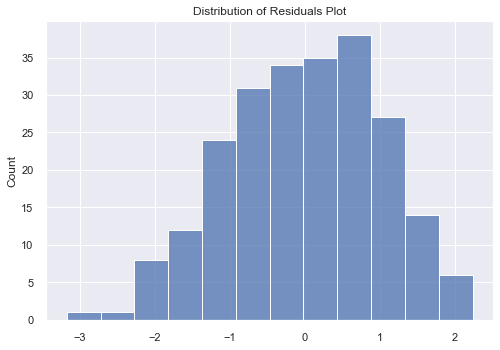

In [855]:
# Get the difference between the two series and scale to subtract the mean and divide by the standard deviation
res = np.array(working.cnt) - np.array(non_working_days.cnt)
scale_res = scale(res)
sns.histplot(data = scale_res)
plt.title("Distribution of Residuals Plot");

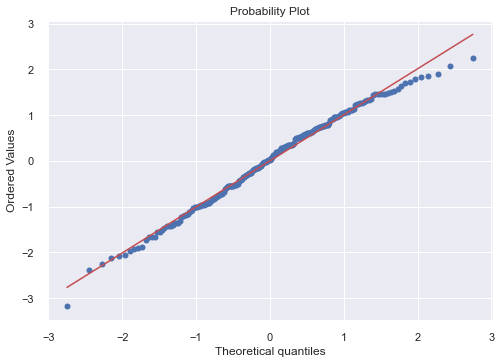

In [856]:
# Alternative plot using scipy stats module
stats.probplot(scale_res, plot = plt,dist = "norm")
plt.show()

In [857]:
# Null Hypothesis is normally distributed data
stats.shapiro(scale_res)

ShapiroResult(statistic=0.9909175038337708, pvalue=0.1596735417842865)

Residual data is normally distributed

In [858]:
# Perform the t-test - Null hypothesis that there the two means are different
stats.ttest_ind(working.cnt,non_working_days.cnt)

Ttest_indResult(statistic=2.593137922797285, pvalue=0.009813473969973572)

The p-value is high, we fail to reject the null hypothesis, the means do not vary. Whether it is a working day or not does not affect the number of bikes hired.

In [859]:
#  Alternative method to display the results
descriptives, results = rp.ttest(working.cnt, non_working_days.cnt)

In [860]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,231.0,4801.926407,1853.128813,121.926924,4561.689914,5042.162900
1,cnt,231.0,4330.168831,2052.141245,135.020981,4064.132702,4596.204960
2,combined,462.0,4566.047619,1967.270286,91.525697,4386.188347,4745.906891


In [861]:
results

,Independent t-test,results
0,Difference (cnt - cnt) =,471.7576
1,Degrees of freedom =,460.0000
2,t =,2.5931
3,Two side test p value =,0.0098
4,Difference < 0 p value =,0.9951
5,Difference > 0 p value =,0.0049
6,Cohen's d =,0.2413
7,Hedge's g =,0.2409
8,Glass's delta =,0.2546
9,r =,0.1200


## Does the temperature affect the number of bikes hired or not?

In [862]:
bike.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


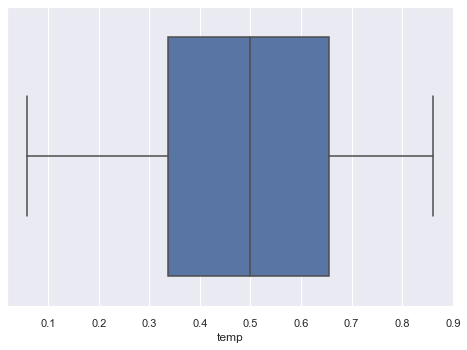

In [863]:
sns.boxplot(data = bike, x = "temp");

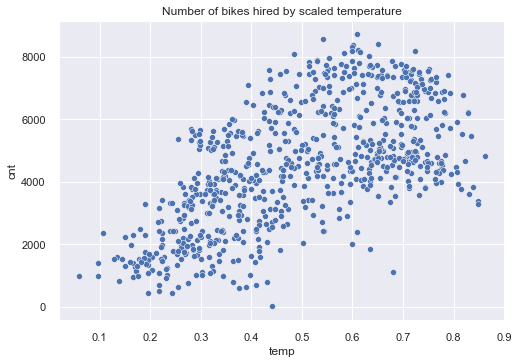

In [864]:
sns.scatterplot(data = bike, x = "temp", y = "cnt")
plt.title("Number of bikes hired by scaled temperature");

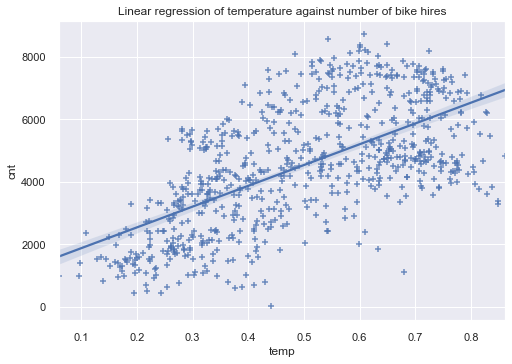

In [865]:
sns.regplot(data = bike,x = "temp", y = "cnt", marker = "+")
plt.title("Linear regression of temperature against number of bike hires");

Appears there might be a linear relationship between temperature and number of bike hires

In [866]:
bike["temp"].mean()

0.49538478850889184

In [867]:
bike.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [868]:
bike['temp_cat'] = np.where(bike['temp']>=bike["temp"].mean(), 'True', 'False')

In [869]:
bike.groupby("temp_cat")["cnt"].describe()

,count,mean,std,min,25%,50%,75%,max
temp_cat,,,,,,,,
False,364.0,3387.664835,1691.340133,22.0,1964.5,3301.0,4513.5,8090.0
True,367.0,5611.904632,1475.698228,1115.0,4548.5,5336.0,6897.5,8714.0


The means between the two groups vary quite a bit

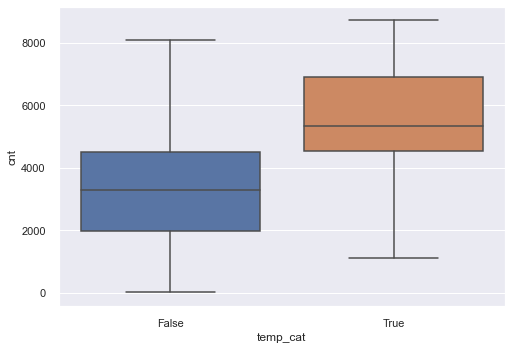

In [870]:
# Is the difference significant?
sns.boxplot(data = bike, x = "temp_cat", y = "cnt");

This is further supported by the boxplot

In [871]:
bike.sample(5)

,season,mnth,holiday,workingday,weathersit,temp,cnt,temp_cat
530,2,6,0,1,1,0.648333,7363,True
448,2,3,0,0,2,0.502500,3372,True
548,3,7,0,1,1,0.781667,6227,True
519,2,6,0,0,1,0.602500,7641,True
544,3,6,0,1,1,0.749167,6879,True


In [872]:
# Separate into two groups
warm_days = bike[bike["temp_cat"] == 'True']
cool_days = bike[bike["temp_cat"] == 'False']

In [873]:
print(warm_days.shape)
print(cool_days.shape)

(367, 8)
(364, 8)


In [874]:
# The samples need to match so sample from the larger dataset
warm_days = warm_days.sample(364)

In [875]:
# Null hypothesis - the two variances are the same
stats.levene(warm_days.cnt, cool_days.cnt)

LeveneResult(statistic=4.391563486923294, pvalue=0.03646294623631394)

The variances are different as the p-value is below 0.05

In [876]:
# Have a look at std deviations
print(warm_days.cnt.std())
print(cool_days.cnt.std())

1480.473809002296
1691.3401333214201


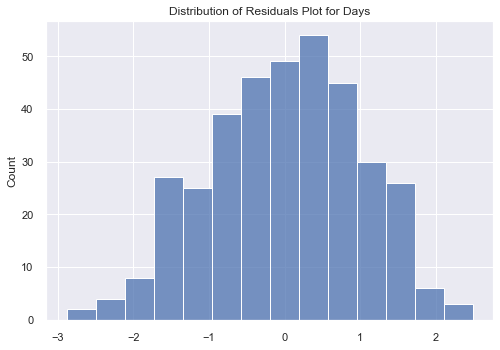

In [877]:
# Test the residuals of the samples
# Get the difference between the two series and scale to subtract the mean and divide by the standard deviation
res2 = np.array(warm_days.cnt) - np.array(cool_days.cnt)
scaled = scale(res2)
sns.histplot(data = scaled)
plt.title("Distribution of Residuals Plot for Days");

The residuals seem normally distributed

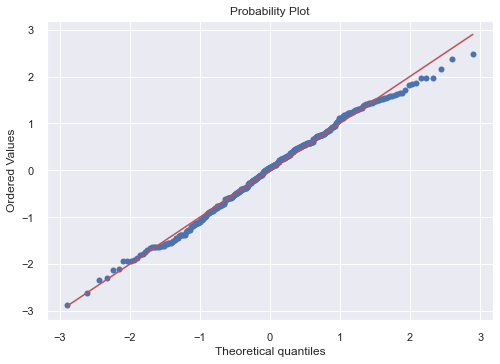

In [878]:
# Alternative plot using scipy stats module
stats.probplot(scaled, plot = plt,dist = "norm")
plt.show()

In [879]:
# Null Hypothesis is normally distributed data
stats.shapiro(scaled)

ShapiroResult(statistic=0.9928961992263794, pvalue=0.08238222450017929)

The test is significant the residuals are not normally distributed. We will accept this for the moment since the histogram and qq plot seem normally distributed.

In [880]:
# Perform the t-test - Null hypothesis that there the two means are different
stats.ttest_ind(warm_days.cnt,cool_days.cnt)

Ttest_indResult(statistic=18.849741742483875, pvalue=8.080582698939157e-65)

The p-value is very small, so we would normally conclude that the means of the two datasets do vary, ie we would reject the null. However, the levenes test indicated that the data did not have the same variance, so we need to be careful with the results here.

In [881]:
# Use Welch's test instead
descriptives, results = rp.ttest(warm_days.cnt, cool_days.cnt, equal_variances = False)

In [882]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,364.0,5608.442308,1480.473809,77.597912,5455.844412,5761.040204
1,cnt,364.0,3387.664835,1691.340133,88.650311,3213.332169,3561.997501
2,combined,728.0,4498.053571,1938.401746,71.841948,4357.011129,4639.096014


In [883]:
results

,Welch's t-test,results
0,Difference (cnt - cnt) =,2220.7775
1,Degrees of freedom =,713.4968
2,t =,18.8497
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,1.3972
7,Hedge's g =,1.3958
8,Glass's delta =,1.5000
9,r =,0.5766


This test returns a p-value of zero which indicates that we can reject the null hypothesis, the means of the datasets are not the same. Hot weather days have more bike hires than cold weather days.

## Paired Independent T-test

### Test blood pressure results before and after an intervention

In [884]:
df = pd.read_csv("C:/Users/Imy Hull/datasets/blood_pressure.csv")

In [885]:
df.shape

(120, 5)

In [886]:
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [887]:
df.describe()

,patient,bp_before,bp_after
count,120.000000,120.000000,120.000000
mean,60.500000,156.450000,151.358333
std,34.785054,11.389845,14.177622
min,1.000000,138.000000,125.000000
25%,30.750000,147.000000,140.750000
50%,60.500000,154.500000,149.500000
75%,90.250000,164.000000,161.000000
max,120.000000,185.000000,185.000000


Appears that the mean and median blood pressure has dropped after the intervention

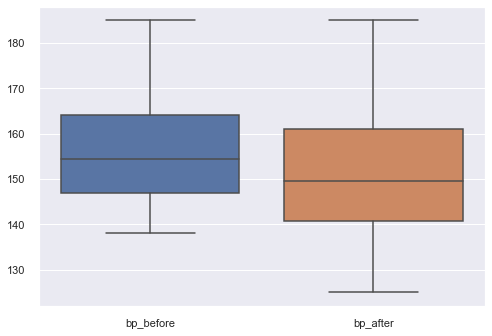

In [888]:
sns.boxplot(data = df[["bp_before","bp_after"]]);

In [889]:
# Null hypothesis - the two variances are the same
stats.levene(df.bp_before, df.bp_after)

LeveneResult(statistic=4.863729003161597, pvalue=0.028383666362347747)

The p-statistic indicates significance, the variances are not the same. We cannot use the independent t-test

In [890]:
df["diff"] = scale(df["bp_before"] - df["bp_after"])
df.head()

,patient,sex,agegrp,bp_before,bp_after,diff
0,1,Male,30-45,143,153,-0.906743
1,2,Male,30-45,163,170,-0.726496
2,3,Male,30-45,153,168,-1.207155
3,4,Male,30-45,153,142,0.354987
4,5,Male,30-45,146,141,-0.005508


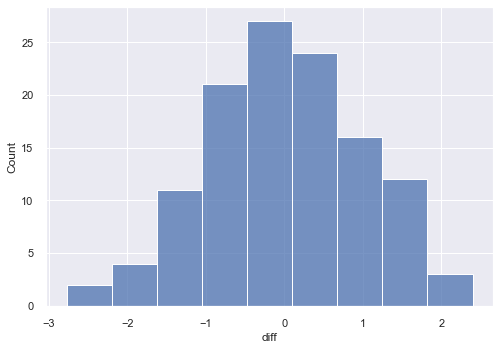

In [891]:
sns.histplot(data = df, x = "diff");

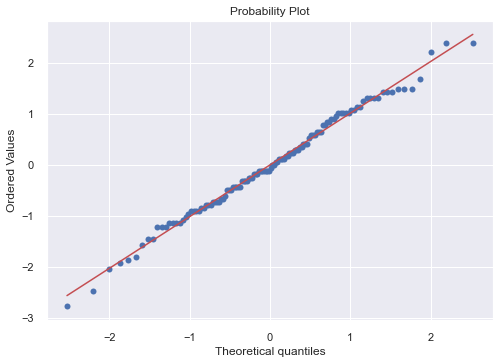

In [892]:
stats.probplot(df["diff"], plot = plt)
plt.show()

In [893]:
# Null Hypothesis is normally distributed data
stats.shapiro(df["diff"])

ShapiroResult(statistic=0.992684006690979, pvalue=0.7841646671295166)

Accept the null hypothesis, the residuals are normally distributed

In [894]:
# Perform the t-test - Null hypothesis that there the two means are different
stats.ttest_rel(df.bp_before,df.bp_after)

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

The test is significant and we can reject the null, the intervention does affect blood pressure. HOWEVER, the variances were not the same, so we need to be careful with interpretation.

In [895]:
# Use Scipy with paired equal to true and variances equal to true which compares the medians (signed rank test)
rp.ttest(df["bp_before"], df["bp_after"], paired = True, equal_variances = False)

,Wilcoxon signed-rank test,results
0,Mean for bp_before =,156.450000
1,Mean for bp_after =,151.358333
2,T value =,2234.500000
3,Z value =,-3.191600
4,Two sided p value =,0.001400
5,r =,-0.206000


The differences in the medians are significant as the p-value is below 0.05

# ANOVA

In [896]:
bike = bike.drop("temp_cat",axis = 1)

In [897]:
bike.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [898]:
bike.groupby("weathersit")["cnt"].describe().T

weathersit,1,2,3
count,463.000000,247.000000,21.000000
mean,4876.786177,4035.862348,1803.285714
std,1879.483989,1809.109918,1240.284449
min,431.000000,605.000000,22.000000
25%,3636.500000,2674.500000,705.000000
50%,4844.000000,4040.000000,1817.000000
75%,6458.500000,5257.500000,2424.000000
max,8714.000000,8362.000000,4639.000000


The average count of bikes rented appear to be different

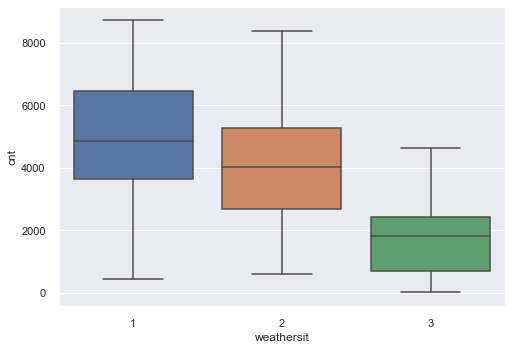

In [899]:
sns.boxplot(data = bike, x = "weathersit",y = "cnt");

On clear days, more bikes are rented than those that have storms

In [900]:
# One way anova tests whether the means are the same. The null hypothesis is that the means are the same
stats.f_oneway(bike["cnt"],bike["weathersit"] == 1, bike["cnt"], bike["weathersit"] == 2, bike["cnt"], bike["weathersit"] ==3,)

F_onewayResult(statistic=2370.905856885025, pvalue=0.0)

We reject the null hypothesis, the means vary.

However, the test does not specify the differences between the groups

In [901]:
from statsmodels.stats.multicomp import MultiComparison

In [902]:
mult_comp = MultiComparison(bike["cnt"], bike["weathersit"])
result = mult_comp.tukeyhsd()
print(result)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     1      2  -840.9238 0.001  -1181.639  -500.2086   True
     1      3 -3073.5005 0.001 -4038.2706 -2108.7304   True
     2      3 -2232.5766 0.001 -3215.4794 -1249.6738   True
-----------------------------------------------------------


We reject the null hypothesis after comparing each group

## Two Way Anova

In [903]:
bike.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [904]:
# Two variables - weather and the season
rp.summary_cont(bike.groupby("weathersit")["cnt"])

,N,Mean,SD,SE,95% Conf.,Interval
weathersit,,,,,,
1,463,4876.7862,1879.4840,87.3470,4705.1395,5048.4329
2,247,4035.8623,1809.1099,115.1109,3809.1337,4262.5910
3,21,1803.2857,1240.2844,270.6523,1238.7150,2367.8564


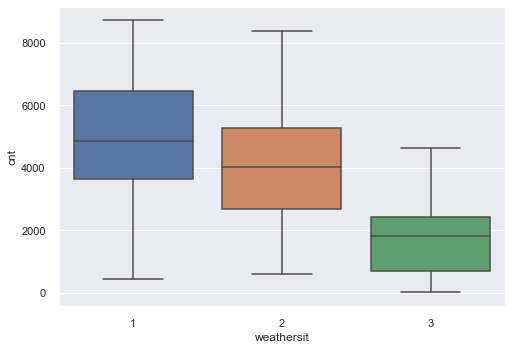

In [905]:
sns.boxplot(data = bike, x = "weathersit", y = "cnt");

In [906]:
rp.summary_cont(bike.groupby("season")["cnt"])

,N,Mean,SD,SE,95% Conf.,Interval
season,,,,,,
1,181,2604.1326,1399.9421,104.0569,2398.8044,2809.4608
2,184,4992.3315,1695.9772,125.0291,4745.6476,5239.0154
3,188,5644.3032,1459.8004,106.4669,5434.2727,5854.3337
4,178,4728.1629,1699.6153,127.3915,4476.7612,4979.5647


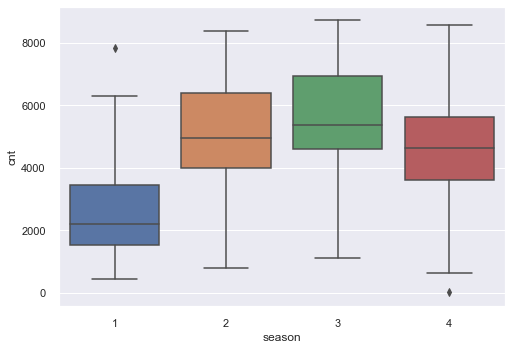

In [907]:
sns.boxplot(data = bike, x = "season", y = "cnt");

## OLS Regression

### Weather situation and bike hires

In [908]:
# Run regression analysis on count of bikes versus weather (note weathersit is dummy encoded using C)
model= ols('cnt ~ C(weathersit)', bike).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     40.07
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           3.11e-17
Time:                        13:21:02   Log-Likelihood:                -6531.5
No. Observations:                 731   AIC:                         1.307e+04
Df Residuals:                     728   BIC:                         1.308e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4876.7862     85.567     56.994      0.000    4708.798    5044.774
C(weathersit)[T.2]  -840.9238    145.073     -5.797      0.000   -1125.736    -556.112
C(weathersit)[T.3] -3073.5005    410.790     -7.482      0.000   -3879.975   -2267.026
==============================================================================
Omnibus:                       38.064   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.665
Skew:                          -0.061   Prob(JB):                     0.000397
Kurtosis:                       2.293   Cond. No.                         6.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value for F-statistic shows the regression is significant. The R2 and adjusted R2 is very low.

### Season and bike hires

In [909]:
# Run regression analysis on count of bikes versus season (note season is dummy encoded using C)
model= ols('cnt ~ C(season)', bike).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     128.8
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           6.72e-67
Time:                        13:21:02   Log-Likelihood:                -6413.9
No. Observations:                 731   AIC:                         1.284e+04
Df Residuals:                     727   BIC:                         1.285e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2604.1326    116.598     22.334      0.000    2375.223    2833.042
C(season)[T.2]  2388.1989    164.221     14.543      0.000    2065.795    2710.603
C(season)[T.3]  3040.1706    163.352     18.611      0.000    2719.472    3360.869
C(season)[T.4]  2124.0303    165.588     12.827      0.000    1798.943    2449.118
==============================================================================
Omnibus:                        3.050   Durbin-Watson:                   0.469
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.765
Skew:                           0.080   Prob(JB):                        0.251
Kurtosis:                       2.745   Cond. No.                         4.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

These variables are also significant.

### Weather situation versus season and bike hires as independent variables

In [910]:
# Run regression analysis on count of bikes and weathersit versus season 
model= ols('cnt ~ C(season) + C(weathersit)', bike).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     112.0
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           1.13e-87
Time:                        13:21:03   Log-Likelihood:                -6360.4
No. Observations:                 731   AIC:                         1.273e+04
Df Residuals:                     725   BIC:                         1.276e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2931.9780    116.990     25.062      0.000    2702.298    3161.658
C(season)[T.2]      2373.7766    152.858     15.529      0.000    2073.680    2673.873
C(season)[T.3]      2959.8305    152.566     19.400      0.000    2660.307    3259.354
C(season)[T.4]      2229.8300    154.522     14.431      0.000    1926.466    2533.194
C(weathersit)[T.2]  -711.6121    115.707     -6.150      0.000    -938.772    -484.452
C(weathersit)[T.3] -3093.4043    327.354     -9.450      0.000   -3736.080   -2450.729
==============================================================================
Omnibus:                       13.761   Durbin-Watson:                   0.417
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               11.659
Skew:                           0.238   Prob(JB):                      0.00294
Kurtosis:                       2.604   Cond. No.                         7.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The plus sign does not consider the interaction between the two variables.

In [911]:
# Anova on each of the variables
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(season),3.0,9.505959e+08,3.168653e+08,148.649726,4.481108e-75
C(weathersit),2.0,2.435123e+08,1.217561e+08,57.118964,9.208258e-24
Residual,725.0,1.545427e+09,2.131624e+06,NaN,NaN


The differences in the means of different categories is significant. Both affect the number of bikes hired. The interaction is not considered.

### Weather situation and season and bike hires as interaction variables

In [912]:
# Adding an interaction
# Run regression analysis on count of bikes and weathersit versus season 
model= ols('cnt ~ C(season) * C(weathersit)', bike).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     52.85
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           5.25e-85
Time:                        13:21:03   Log-Likelihood:                -6353.1
No. Observations:                 731   AIC:                         1.273e+04
Df Residuals:                     719   BIC:                         1.279e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          2811.1351    137.768     20.405      0.000    2540.660    3081.611
C(season)[T.2]                     2737.4135    193.969     14.113      0.000    2356.600    3118.228
C(season)[T.3]                     3067.1222    185.664     16.520      0.000    2702.614    3431.630
C(season)[T.4]                     2232.4280    198.581     11.242      0.000    1842.561    2622.295
C(weathersit)[T.2]                 -453.9685    225.612     -2.012      0.045    -896.906     -11.031
C(weathersit)[T.3]                -1876.3851    738.699     -2.540      0.011   -3326.649    -426.121
C(season)[T.2]:C(weathersit)[T.2]  -857.8743    317.060     -2.706      0.007   -1480.349    -235.400
C(season)[T.3]:C(weathersit)[T.2]  -201.8097    332.089     -0.608      0.544    -853.790     450.171
C(season)[T.4]:C(weathersit)[T.2]    64.4054    322.129      0.200      0.842    -568.021     696.832
C(season)[T.2]:C(weathersit)[T.3] -2503.1635   1125.425     -2.224      0.026   -4712.675    -293.653
C(season)[T.3]:C(weathersit)[T.3] -1250.1222   1043.006     -1.199      0.231   -3297.824     797.580
C(season)[T.4]:C(weathersit)[T.3] -1205.5780    881.367     -1.368      0.172   -2935.939     524.783
==============================================================================
Omnibus:                       13.342   Durbin-Watson:                   0.422
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.110
Skew:                           0.261   Prob(JB):                      0.00235
Kurtosis:                       2.647   Cond. No.                         35.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Identify those variables of most significance

In [913]:
# Anova on each of the variables
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(season),3.0,9.505959e+08,3.168653e+08,150.402482,1.197593e-75
C(weathersit),2.0,2.435123e+08,1.217561e+08,57.792465,5.313463e-24
C(season):C(weathersit),6.0,3.065076e+07,5.108460e+06,2.424769,2.505746e-02
Residual,719.0,1.514776e+09,2.106782e+06,NaN,NaN


The p-values indicate that significance, there is a difference between the means of the variables as well as with the interaction variables.

## Chi-Squared

In [914]:
df = pd.read_csv("C:/Users/Imy Hull/datasets/E-commerce.csv")

In [915]:
df.head()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,5,1,4,General,Dresses,Dresses
2,2,1077,60,3,0,0,General,Dresses,Dresses
3,3,1049,50,5,1,0,General Petite,Bottoms,Pants
4,4,847,47,5,1,6,General,Tops,Blouses


In [916]:
df2 = df[["Rating","Recommended IND"]]
df2.head()

,Rating,Recommended IND
0,4,1
1,5,1
2,3,0
3,5,1
4,5,1


### Do the Ratings associated with a product fit with recommended indicator?

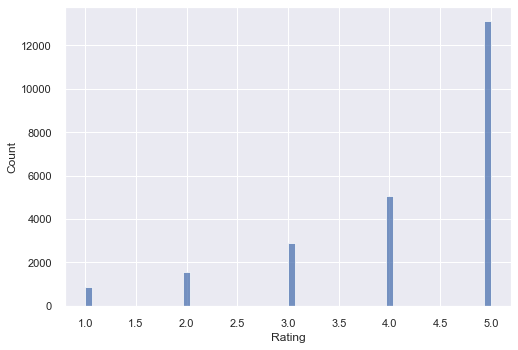

In [917]:
sns.histplot(data = df2, x = "Rating");

Most products are high rated

In [918]:
cross = pd.crosstab(df2["Rating"], df2["Recommended IND"])
cross

Recommended IND,0,1
Rating,,
1,826,16
2,1471,94
3,1682,1189
4,168,4909
5,25,13092


High rated items have indicator 1 and low rated have indicator 0. The rating of '3' is split between the two categories.

In [919]:
chi2, p_value, degrees_of_freedom, expected_values = chi2_contingency(cross.values)

In [920]:
print(chi2)
print(p_value)
print(degrees_of_freedom)

16711.66423874487
0.0
4


In [921]:
expected_values.T

array([[  149.66019087,   278.16888207,   510.30214724,   902.40473756,
         2331.46404226],
       [  692.33980913,  1286.83111793,  2360.69785276,  4174.59526244,
        10785.53595774]])

Are the ratings made by the site independent of the product ratings?
The test-statistic is high and the p-value is below 0.05 so we can reject the null value, the site ratings are independent of the product ratings. The e-commerce site recommended ratings are not independent of the product ratings

In [922]:
expected_df = pd.DataFrame({
    '0': expected_values.T[0],
    '1': expected_values.T[1],
})

In [923]:
expected_df

,0,1
0,149.660191,692.339809
1,278.168882,1286.831118
2,510.302147,2360.697853
3,902.404738,4174.595262
4,2331.464042,10785.535958


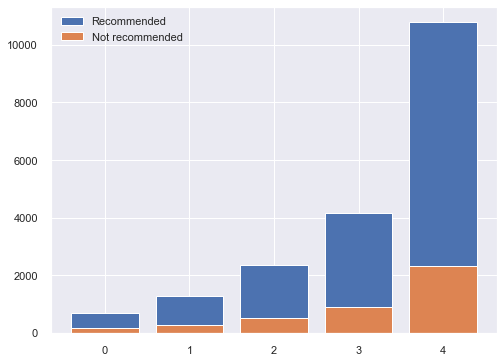

In [924]:
plt.figure(figsize=(8,6))

plt.bar(expected_df.index, expected_df['1'], label="Recommended")
plt.bar(expected_df.index, expected_df['0'], label="Not recommended")

plt.legend();

In [925]:
ratings_recommended = df[df['Recommended IND'] == 1]
ratings_not_recommended = df[df['Recommended IND'] == 0]

In [926]:
ratings_recommended.shape, ratings_not_recommended.shape

((19300, 9), (4172, 9))

In [927]:
ratings_recommended.sample(10)

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
21048,21058,1083,27,4,1,1,General Petite,Dresses,Dresses
22262,22273,975,42,5,1,5,General Petite,Jackets,Jackets
20136,20146,520,35,5,1,0,Initmates,Intimate,Layering
11575,11576,824,25,5,1,2,General Petite,Tops,Blouses
10865,10866,1081,34,5,1,4,General Petite,Dresses,Dresses
22638,22649,657,53,4,1,1,Initmates,Intimate,Lounge
6328,6328,938,46,4,1,0,General Petite,Tops,Sweaters
21268,21278,1044,39,4,1,1,General,Bottoms,Pants
6942,6942,850,56,5,1,4,General,Tops,Blouses
7964,7964,939,33,5,1,0,General Petite,Tops,Sweaters


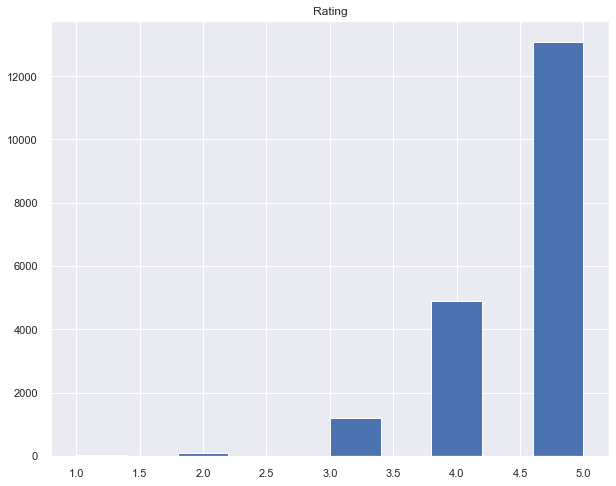

In [928]:
ratings_recommended[['Rating']].hist(figsize=(10, 8));

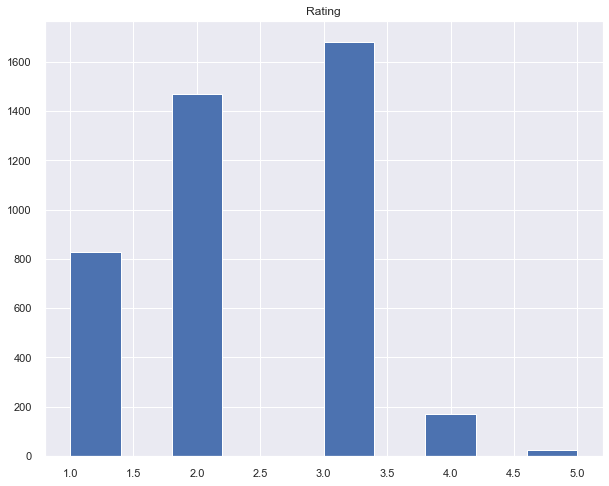

In [929]:
ratings_not_recommended[['Rating']].hist(figsize=(10, 8));

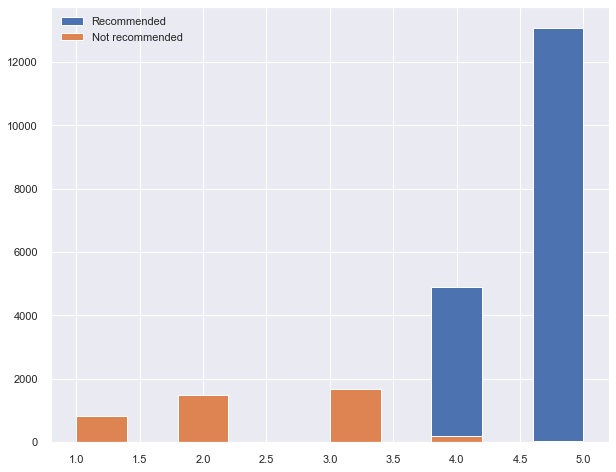

In [930]:
plt.figure(figsize=(10, 8))

plt.hist(ratings_recommended['Rating'], label="Recommended")
plt.hist(ratings_not_recommended['Rating'], label="Not recommended")

plt.legend();

## Simple Linear Model Using ML on Single Variable

In [931]:
df = pd.read_csv("C:/Users/Imy Hull/datasets/kc_house_data.csv")

In [932]:
df.shape

(21613, 21)

In [933]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [934]:
df = df.drop(["id","lat","long","zipcode"],axis = 1)

In [935]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [936]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 

In [937]:
# Convert date to datetime
df["date"] = pd.to_datetime(df["date"])

In [938]:
# Create new column of house age
df["house_age"] = df["date"].dt.year - df["yr_built"]

In [939]:
# Drop columns not required
df.drop(["date","yr_built"],axis = 1,inplace = True)

In [940]:
# Change the renovated column to a categorical (0 if not and 1 if renovated)
df["renovated"] = df["yr_renovated"].apply(lambda x: 0 if x== 0 else 1 )
df.drop("yr_renovated",axis = 1, inplace = True)

In [941]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,63,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28,0


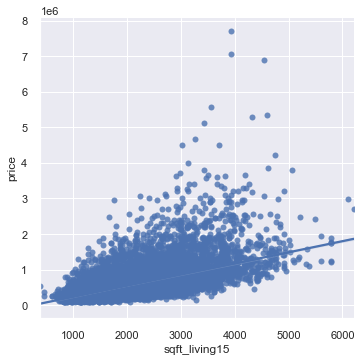

In [942]:
# Relationship between price and living space
sns.lmplot(data = df, x = "sqft_living15", y = "price");

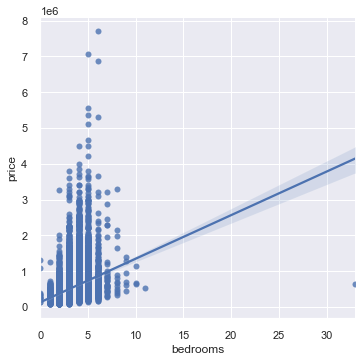

In [943]:
# Relationship between price and number of bedrooms
sns.lmplot(data = df, x = "bedrooms", y = "price");

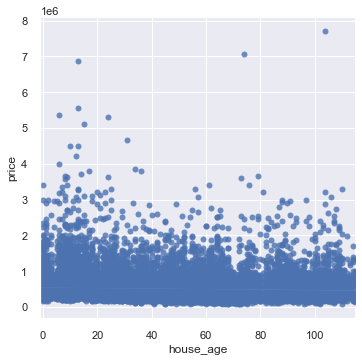

In [944]:
# Relationship between price and age
sns.lmplot(data = df, x = "house_age", y = "price");

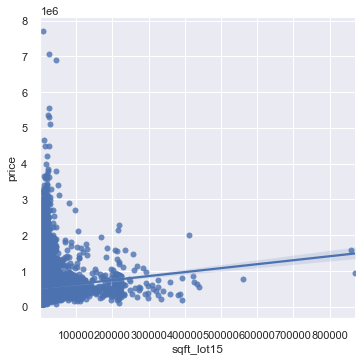

In [945]:
# Relationship between price and lot size
sns.lmplot(data = df, x = "sqft_lot15", y = "price");

In [946]:
# Import the libraries for ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [947]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'house_age',
       'renovated'],
      dtype='object')

In [948]:
# Define X and y variables
X = df["sqft_living"]
y = df["price"]

In [949]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [950]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17290,) (4323,) (17290,) (4323,)


In [951]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [952]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [953]:
linear_regression = LinearRegression()
model = linear_regression.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [954]:
compare = pd.DataFrame({'test':y_test,'predicted':y_pred})
compare.sample(10)

,test,predicted
10571,480000.0,187235.732999
3050,517000.0,287875.453552
16540,419625.0,707207.622525
16118,329990.0,634523.379903
6298,490000.0,609363.449765
4393,353000.0,573021.328454
19326,159000.0,338195.313829
16845,800000.0,838598.368803
10261,490000.0,354968.600588
5382,329000.0,494745.990245


In [955]:
compare.shape

(4323, 2)

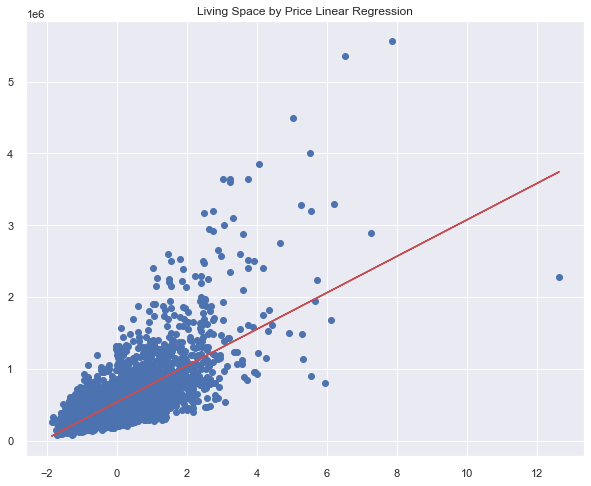

In [956]:
plt.figure(figsize=(10, 8))

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.title("Living Space by Price Linear Regression");

In [957]:
# Get the training score
model.score(X_train, y_train)

0.49238383875829517

Just under 50% of the variance in the data was captured by the linear model

In [958]:
r2_score(y_test, y_pred)

0.49406905389089006

The adjusted r2 on the test instances based on actual versus predicted. The model is robust as they are similar. Based on just one variable.

In [959]:
model.intercept_

537768.04794679

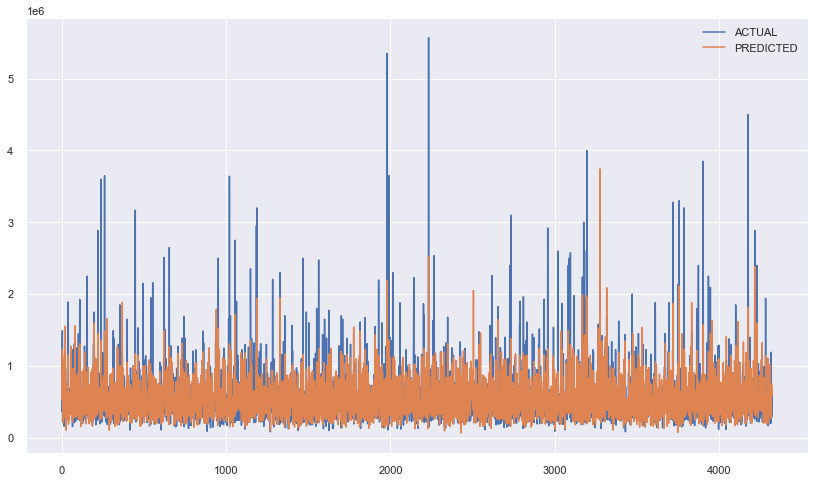

In [960]:
# Plot the predicted and actual values
fig, ax = plt.subplots(figsize = (14,8))
plt.plot(y_test.values, label = "ACTUAL")
plt.plot(y_pred, label = "PREDICTED")
plt.legend();

## Compare to StatsModels Linear Regression Result

In [961]:
# Add a constant
X_train = sm.add_constant(X_train)

In [962]:
# Build and summarise the model
modelsm = sm.OLS(y_train, X_train).fit()
modelsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.677e+04
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:21:22   Log-Likelihood:            -2.3995e+05
No. Observations:               17290   AIC:                         4.799e+05
Df Residuals:                   17288   BIC:                         4.799e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.378e+05   1958.609    274.566      0.000    5.34e+05    5.42e+05
x1          2.536e+05   1958.609    129.496      0.000     2.5e+05    2.57e+05
==============================================================================
Omnibus:                    11990.495   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           483410.340
Skew:                           2.835   Prob(JB):                         0.00
Kurtosis:                      28.276   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [963]:
# Get the coefficient and intercept from the ML Model
model.coef_, model.intercept_

(array([253632.14695269]), 537768.04794679)

The results from statsmodels and ML are the same

## Multiple Regression Using ML

In [964]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,63,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28,0


In [965]:
X = df.drop("price",axis = 1)
y = df["price"]

In [966]:
from yellowbrick.target import FeatureCorrelation

In [967]:
# Get the correlations of each feature and the price as a target
features = list(X.columns)

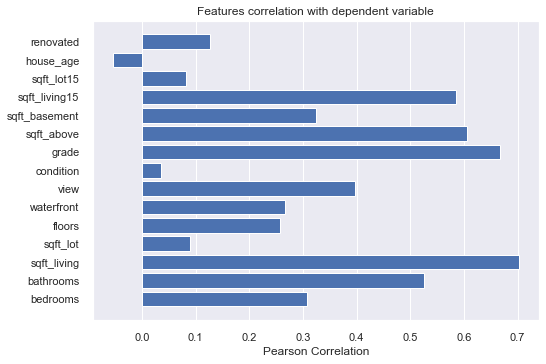

In [968]:
visualizer = FeatureCorrelation(labels = features)
visualizer.fit(X,y)
visualizer.poof();

### Choose variables to include in regression

In [969]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [970]:
# Run selectkbest
select_univariate = SelectKBest(f_regression, k=5).fit(X,y)

In [971]:
# Which features are correlated?
select_features = select_univariate.get_support()
select_features

array([False,  True,  True, False, False, False, False, False,  True,
        True, False,  True, False, False, False])

In [972]:
# Identify those columns
selected_columns = X.columns[select_features]
selected_columns

Index(['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15'], dtype='object')

In [973]:
# Select those columns from the original features
selected_features = X[selected_columns]
selected_features.head()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,1.00,1180,7,1180,1340
1,2.25,2570,7,2170,1690
2,1.00,770,6,770,2720
3,3.00,1960,7,1050,1360
4,2.00,1680,8,1680,1800


In [974]:
# Compare the features
selected_features.describe()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2.114757,2079.899736,7.656873,1788.390691,1986.552492
std,0.770163,918.440897,1.175459,828.090978,685.391304
min,0.000000,290.000000,1.000000,290.000000,399.000000
25%,1.750000,1427.000000,7.000000,1190.000000,1490.000000
50%,2.250000,1910.000000,7.000000,1560.000000,1840.000000
75%,2.500000,2550.000000,8.000000,2210.000000,2360.000000
max,8.000000,13540.000000,13.000000,9410.000000,6210.000000


The mean and standard deviation of the features varies so should be scaled

In [975]:
# Split into training and test set first
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size =0.2, random_state = 42)

In [976]:
# Apply standard scaler to train and test sets 
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [977]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape )

(17290, 5) (4323, 5) (17290,) (4323,)


In [978]:
# Define model and fit
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [979]:
# Predict y values
y_pred = linear_model.predict(X_test)

In [980]:
# Compare predicted with actual
compare = pd.DataFrame({'test': y_test, 'Predicted': y_pred})
compare.head()

,test,Predicted
735,365000.0,5.562020e+05
2830,865000.0,7.548163e+05
4106,1038000.0,1.181665e+06
16218,1490000.0,1.395348e+06
19964,711000.0,7.319657e+05


In [981]:
# Get the r squared score for training and test data
print(linear_model.score(X_train, y_train))
print(r2_score(y_test, y_pred))

0.5429398809326067
0.5480396608809952


The test score is higher than the training score so the model is robust and is not overfitting

In [982]:
# Print coefficients and intercept
print(linear_model.coef_)
print("\n")
print(linear_model.intercept_)

[-24310.56547673 222256.96507498 126803.48122727 -66833.78477444
  15572.67354627]


537768.0479467901


## Multiple Regression using Statsmodels

In [983]:
X_train = sm.add_constant(X_train)

In [984]:
X_train = pd.DataFrame(X_train)
X_train.columns = ['constant','bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']
X_train.shape

(17290, 6)

In [985]:
y_train = list(y_train)

In [986]:
# Build and summarise the model
modelsm = sm.OLS(y_train,X_train).fit()

In [987]:
print(modelsm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     4106.
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:21:23   Log-Likelihood:            -2.3904e+05
No. Observations:               17290   AIC:                         4.781e+05
Df Residuals:                   17284   BIC:                         4.781e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
constant       5.378e+05   1858.733    289.320

## Alternative way to choose the most relevant features

Can change the first parameter in the SelectKBest to 'mutual_info_regression'. This changes the feature selection to be based on the mutual dependence between the two variables. This might change the features selected.

# Predictive Models for Categorical Data - Logistic Regession

In [994]:
df = pd.read_csv("C:/Users/Imy Hull/datasets/gender_voice_dataset.csv")
df.sample(3)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
2295,0.226640,0.046018,0.238636,0.215909,0.255000,0.039091,2.066021,6.970632,0.861787,0.290298,...,0.226640,0.174326,0.047291,0.279070,1.988770,0.023438,11.953125,11.929688,0.082961,female
2700,0.218014,0.045807,0.230195,0.177961,0.255705,0.077744,1.002000,2.630978,0.882365,0.257080,...,0.218014,0.166390,0.047856,0.275862,1.189844,0.023438,8.320312,8.296875,0.125759,female
2764,0.187506,0.033578,0.187789,0.170105,0.201684,0.031579,2.755336,11.464096,0.843727,0.237264,...,0.187506,0.170511,0.048000,0.277457,1.603431,0.023438,11.601562,11.578125,0.094106,female


In [991]:
df.shape

(3168, 21)

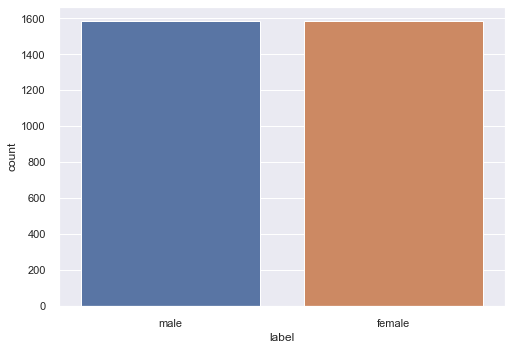

In [996]:
sns.countplot(data = df, x = "label");

The dataset is balanced

In [998]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.180907,0.029918,0.039363,0.163662,0.184838,0.199146,0.251124
sd,3168.0,0.057126,0.016652,0.018363,0.041954,0.059155,0.067020,0.115273
median,3168.0,0.185621,0.036360,0.010975,0.169593,0.190032,0.210618,0.261224
Q25,3168.0,0.140456,0.048680,0.000229,0.111087,0.140286,0.175939,0.247347
Q75,3168.0,0.224765,0.023639,0.042946,0.208747,0.225684,0.243660,0.273469
IQR,3168.0,0.084309,0.042783,0.014558,0.042560,0.094280,0.114175,0.252225
skew,3168.0,3.140168,4.240529,0.141735,1.649569,2.197101,2.931694,34.725453
kurt,3168.0,36.568461,134.928661,2.068455,5.669547,8.318463,13.648905,1309.612887
sp.ent,3168.0,0.895127,0.044980,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,0.408216,0.177521,0.036876,0.258041,0.396335,0.533676,0.842936


In [999]:
# Not required to standardise
from sklearn.preprocessing import LabelEncoder

In [1003]:
# Change from strings to either a zero or one (female = 0, male = 1)
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["label"].astype(str))

In [1002]:
df.label.value_counts()

1    1584
0    1584
Name: label, dtype: int64

In [1004]:
X= df.drop("label",axis = 1)
y = df["label"]

In [1005]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [1012]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(penalty = 'l2', solver = 'liblinear')
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

In [1013]:
# Compare predicted with actual
compare_log = pd.DataFrame({'test': y_test, 'Predicted': y_pred})
compare_log.head()

,test,Predicted
2148,0,0
1124,1,1
170,1,1
3158,0,0
2229,0,0


In [1015]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

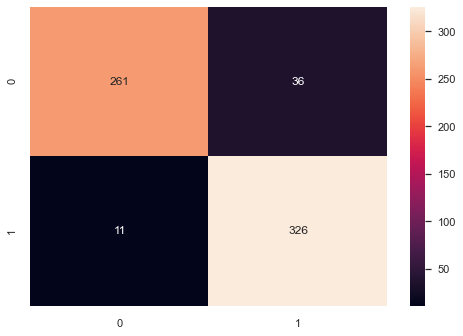

In [1023]:
labels = ["Male","Female"]
sns.heatmap(confusion_matrix(y_test, y_pred),annot = True, fmt = ".0f");

In [1026]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       297
           1       0.90      0.97      0.93       337

    accuracy                           0.93       634
   macro avg       0.93      0.92      0.93       634
weighted avg       0.93      0.93      0.93       634



In [1027]:
logistic_regression.score(X_train, y_train)

0.9072612470402526

In [1028]:
from sklearn.metrics import accuracy_score,recall_score,precision_score

In [1034]:
print(precision_score(y_test, y_pred)) # Of those we predicted as male, how many were actually male?
print(recall_score(y_test, y_pred)) # of those who were male how many were correctly identified?
print(accuracy_score(y_test, y_pred)) # how many were predicted correctly?

0.9005524861878453
0.9673590504451038
0.9258675078864353


## Feature Selection

In [1035]:
# Create list of features
features = list(X)

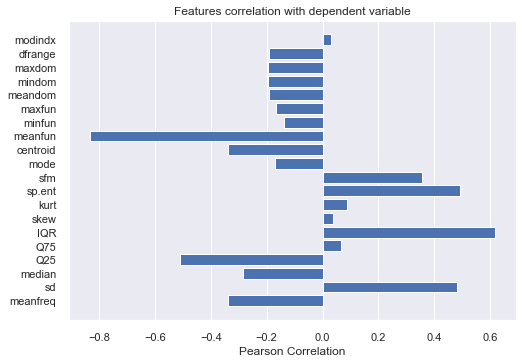

In [1037]:
# Use yellowbrick feature correlation 
visualizer = FeatureCorrelation(labels = features)
visualizer.fit(X,y)
visualizer.poof();

In [1038]:
# Try three different ways of choosing relevant features
from sklearn.feature_selection import chi2,f_classif,mutual_info_classif

### Use Chi-squared

In [1040]:
# Run selectkbest
select_univariate = SelectKBest(chi2, k=4).fit(X,y)
select_features = select_univariate.get_support()
select_features

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False,  True,
        True, False])

In [1041]:
# Identify those columns
selected_columns = X.columns[select_features]
selected_columns

Index(['kurt', 'meandom', 'maxdom', 'dfrange'], dtype='object')

In [1042]:
# Select those columns from the original features
selected_features = X[selected_columns]
selected_features.head()

,kurt,meandom,maxdom,dfrange
0,274.402906,0.007812,0.007812,0.000000
1,634.613855,0.009014,0.054688,0.046875
2,1024.927705,0.007990,0.015625,0.007812
3,4.177296,0.201497,0.562500,0.554688
4,4.333713,0.712812,5.484375,5.476562


In [1044]:
# Check the descriptive statistics of the data
selected_features.describe()

,kurt,meandom,maxdom,dfrange
count,3168.000000,3168.000000,3168.000000,3168.000000
mean,36.568461,0.829211,5.047277,4.994630
std,134.928661,0.525205,3.521157,3.520039
min,2.068455,0.007812,0.007812,0.000000
25%,5.669547,0.419828,2.070312,2.044922
50%,8.318463,0.765795,4.992188,4.945312
75%,13.648905,1.177166,7.007812,6.992188
max,1309.612887,2.957682,21.867188,21.843750


In [1045]:
X_train, X_test, y_train, y_test = train_test_split(selected_features,y, test_size = 0.2, random_state = 42)

In [1046]:
logistic_regression = LogisticRegression(penalty = 'l2', solver = 'liblinear')
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

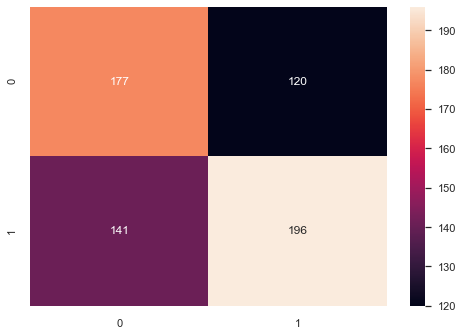

In [1047]:
labels = ["Male","Female"]
sns.heatmap(confusion_matrix(y_test, y_pred),annot = True, fmt = ".0f");

In [1049]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.60      0.58       297
           1       0.62      0.58      0.60       337

    accuracy                           0.59       634
   macro avg       0.59      0.59      0.59       634
weighted avg       0.59      0.59      0.59       634



These results are not very good compared to the base model

### ANOVA Analysis

In [1050]:
# Run selectkbest
select_univariate = SelectKBest(f_classif, k=4).fit(X,y)
select_features = select_univariate.get_support()
select_features

array([False, False, False,  True, False,  True, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False])

In [1051]:
# Identify those columns
selected_columns = X.columns[select_features]
selected_columns

Index(['Q25', 'IQR', 'sp.ent', 'meanfun'], dtype='object')

In [1052]:
# Select those columns from the original features
selected_features = X[selected_columns]
selected_features.head()

,Q25,IQR,sp.ent,meanfun
0,0.015071,0.075122,0.893369,0.084279
1,0.019414,0.073252,0.892193,0.107937
2,0.008701,0.123207,0.846389,0.098706
3,0.096582,0.111374,0.963322,0.088965
4,0.078720,0.127325,0.971955,0.106398


In [1053]:
X_train, X_test, y_train, y_test = train_test_split(selected_features,y, test_size = 0.2, random_state = 42)

In [1054]:
logistic_regression = LogisticRegression(penalty = 'l2', solver = 'liblinear')
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

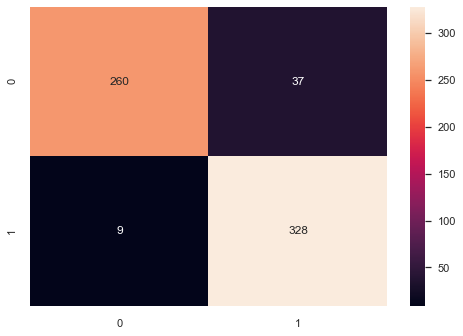

In [1055]:
labels = ["Male","Female"]
sns.heatmap(confusion_matrix(y_test, y_pred),annot = True, fmt = ".0f");

In [1056]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       297
           1       0.90      0.97      0.93       337

    accuracy                           0.93       634
   macro avg       0.93      0.92      0.93       634
weighted avg       0.93      0.93      0.93       634



Good results with just four features and results almost the same as with all the features

In [1057]:
# Run selectkbest
select_univariate = SelectKBest(mutual_info_classif, k=4).fit(X,y)
select_features = select_univariate.get_support()
select_features

array([False,  True, False,  True, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False])

In [1058]:
# Identify those columns
selected_columns = X.columns[select_features]
selected_columns

Index(['sd', 'Q25', 'IQR', 'meanfun'], dtype='object')

In [1059]:
# Select those columns from the original features
selected_features = X[selected_columns]
selected_features.head()

,sd,Q25,IQR,meanfun
0,0.064241,0.015071,0.075122,0.084279
1,0.067310,0.019414,0.073252,0.107937
2,0.083829,0.008701,0.123207,0.098706
3,0.072111,0.096582,0.111374,0.088965
4,0.079146,0.078720,0.127325,0.106398


In [1060]:
X_train, X_test, y_train, y_test = train_test_split(selected_features,y, test_size = 0.2, random_state = 42)

In [1061]:
logistic_regression = LogisticRegression(penalty = 'l2', solver = 'liblinear')
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

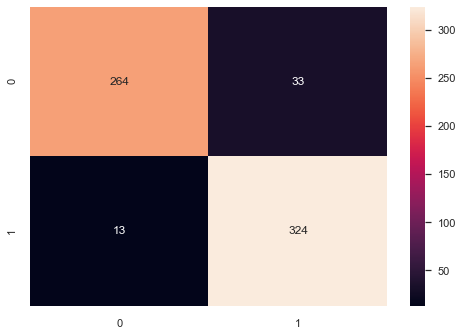

In [1062]:
labels = ["Male","Female"]
sns.heatmap(confusion_matrix(y_test, y_pred),annot = True, fmt = ".0f");

In [1063]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       297
           1       0.91      0.96      0.93       337

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634



This is another very good model, again with just four features but results similar to the whole feature set